In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compare the topic labels generated by each method for 50 reviews

In [21]:
output = pd.read_csv('../data/all_topic_models_body_lotion.csv')
output.shape

(20281, 21)

In [22]:
path = "../data/lotion+spray_ogbertopic_similarity_scores.csv"
og_bertopic_scores = pd.read_csv(path)
og_bertopic_scores = og_bertopic_scores[og_bertopic_scores['subcategory'] == 'BODY CARE BODY LOTION']
og_bertopic_scores.shape

(20281, 11)

In [23]:
# rename columns
og_bertopic_scores.rename(columns={'similarity_score':'og_bertopic_similarity_score'}, inplace=True)
output.rename(columns={'topic':'og_bertopic_topic_label'}, inplace=True)

In [24]:
# merge the two dataframes using review_text, only keep review_text and og_bertopic_similarity_score of the merged dataframe
merged_output = pd.merge(output, og_bertopic_scores[['review_text', 'og_bertopic_similarity_score']], on='review_text', how='inner')
merged_output.shape

(20281, 22)

In [25]:
# move the og_bertopic_similarity_score column to after og_bertopic_topic_label
cols = list(merged_output.columns)
# index of og_bertopic_topic_label
og_bertopic_topic_label_index = cols.index('og_bertopic_topic_label')
cols.insert(og_bertopic_topic_label_index+1, cols.pop())
merged_output = merged_output[cols]

# Create sample of 50 reviews (10 per rating)

In [26]:
# sample 10 reviews for each rating
sample = merged_output.groupby('star_rating').apply(lambda x: x.sample(10), include_groups=True).reset_index(drop=True)
sample.head()

/var/folders/x2/lsyflj4j07jc1sb3w3hfgmjc0000gn/T/ipykernel_89458/3698361383.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = merged_output.groupby('star_rating').apply(lambda x: x.sample(10), include_groups=True).reset_index(drop=True)


,Unnamed: 0,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,og_bertopic_topic_label,...,lsa_topic_number,lsa_topic_words,lsa_topic_label,lsa_similarity_score,lda2vec_topic_label,lda2vec_similarity_score,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,top2vec_topic_label,top2vec_similarity_score
0,1064,Aveeno,"Aveeno Stress Relief Moisturizing Lotion, 18 f...",2024-05-27,Target,PERSONAL CARE,BODY CARE BODY LOTION,i have use this lotion for many year i have us...,1.0,Positive reviews for a makeup remover (undeter...,...,0.0,"bottle, new formula, scent, buy, year, old, li...",Disappointing lotion with old formula and scen...,0.697866,Fragrant lotion formula with unpleasant scent.,0.592033,"""Dead formula or lotions in old or used products""",0.482093,"""Old formula discontinued, fails to moisturize...",0.560433
1,19625,Burt's Bees,"Burt's Bees Radiance Body Lotion, 6 Ounces",2022-09-19,Kroger,PERSONAL CARE,BODY CARE BODY LOTION,i look forward to use this everyday my husband...,1.0,Positive reviews for a makeup remover (undeter...,...,0.0,"bottle, new formula, scent, buy, year, old, li...",Disappointing lotion with old formula and scen...,0.466844,Fragrant lotion formula with unpleasant scent.,0.365969,"""Dead formula or lotions in old or used products""",0.449615,"""Old formula discontinued, fails to moisturize...",0.515367
2,11796,Shea Moisture,"SheaMoisture Body Lotion Daily Hydration, 13 Oz.",2023-07-17,Walgreens,PERSONAL CARE,BODY CARE BODY LOTION,pump broken and product smell moldy,1.0,Positive reviews for a makeup remover (undeter...,...,1.0,"bad, return, strong, dont, smell horrible, bot...",Strong lotion with bad smell and poor scent,0.315452,"""Defective pump and poor lotion quality in rec...",0.510922,"""Strong fragrance does not last, poor skin per...",0.274841,"""Lotion lacks moisturizing properties with unp...",0.186123
3,417,Aveeno,Aveeno Daily Moisturizing Lotion For Dry Skin ...,2024-06-17,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,pump do not work correctly and it be too much ...,1.0,Malfunctioning product pump,...,0.0,"bottle, new formula, scent, buy, year, old, li...",Disappointing lotion with old formula and scen...,0.141291,"""Defective pump and poor lotion quality in rec...",0.513128,"""Product doesn't work on dry skin""",0.199728,"""Old formula discontinued, fails to moisturize...",0.238858
4,17282,Cetaphil,"Cetaphil® Moisturizing Lotion, 16 fl oz",2023-01-30,Kroger,PERSONAL CARE,BODY CARE BODY LOTION,ive be a cetaphil user for year so be excite t...,1.0,Cetaphil cleanser reviews and customer experie...,...,0.0,"bottle, new formula, scent, buy, year, old, li...",Disappointing lotion with old formula and scen...,0.492996,Fragrant lotion formula with unpleasant scent.,0.374954,"""Product doesn't work on dry skin""",0.533472,"""Does not effectively moisturize, causes rash ...",0.469313


In [27]:
# select column names with "topic_label" or "similarity_score" in it
cols = ['star_rating', 'review_text']
cols += [col for col in sample.columns if 'topic_label' in col or 'similarity_score' in col]
sample_simple = sample.loc[:, cols]
sample_simple.head()

,star_rating,review_text,og_bertopic_topic_label,og_bertopic_similarity_score,lsa_topic_label,lsa_similarity_score,lda2vec_topic_label,lda2vec_similarity_score,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,top2vec_topic_label,top2vec_similarity_score
0,1.0,i have use this lotion for many year i have us...,Positive reviews for a makeup remover (undeter...,0.285139,Disappointing lotion with old formula and scen...,0.697866,Fragrant lotion formula with unpleasant scent.,0.592033,"""Dead formula or lotions in old or used products""",0.482093,"""Old formula discontinued, fails to moisturize...",0.560433
1,1.0,i look forward to use this everyday my husband...,Positive reviews for a makeup remover (undeter...,0.277690,Disappointing lotion with old formula and scen...,0.466844,Fragrant lotion formula with unpleasant scent.,0.365969,"""Dead formula or lotions in old or used products""",0.449615,"""Old formula discontinued, fails to moisturize...",0.515367
2,1.0,pump broken and product smell moldy,Positive reviews for a makeup remover (undeter...,0.132097,Strong lotion with bad smell and poor scent,0.315452,"""Defective pump and poor lotion quality in rec...",0.510922,"""Strong fragrance does not last, poor skin per...",0.274841,"""Lotion lacks moisturizing properties with unp...",0.186123
3,1.0,pump do not work correctly and it be too much ...,Malfunctioning product pump,0.611676,Disappointing lotion with old formula and scen...,0.141291,"""Defective pump and poor lotion quality in rec...",0.513128,"""Product doesn't work on dry skin""",0.199728,"""Old formula discontinued, fails to moisturize...",0.238858
4,1.0,ive be a cetaphil user for year so be excite t...,Cetaphil cleanser reviews and customer experie...,0.551062,Disappointing lotion with old formula and scen...,0.492996,Fragrant lotion formula with unpleasant scent.,0.374954,"""Product doesn't work on dry skin""",0.533472,"""Does not effectively moisturize, causes rash ...",0.469313


In [28]:
sample_simple.loc[:, 'topic_label_highest_similarity_score'] = sample_simple.iloc[:, 2:].idxmax(axis=1, numeric_only=True)
sample_simple.loc[:, 'highest_similarity_score'] = sample_simple.iloc[:, 2:].max(axis=1, numeric_only=True).round(3)
sample_simple.loc[:, 'topic_label_lowest_similarity_score'] = sample_simple.iloc[:, 2:].idxmin(axis=1, numeric_only=True)
sample_simple.loc[:, 'lowest_similarity_score'] = sample_simple.iloc[:, 2:].min(axis=1, numeric_only=True).round(3)
sample_simple.head()

,star_rating,review_text,og_bertopic_topic_label,og_bertopic_similarity_score,lsa_topic_label,lsa_similarity_score,lda2vec_topic_label,lda2vec_similarity_score,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,top2vec_topic_label,top2vec_similarity_score,topic_label_highest_similarity_score,highest_similarity_score,topic_label_lowest_similarity_score,lowest_similarity_score
0,1.0,i have use this lotion for many year i have us...,Positive reviews for a makeup remover (undeter...,0.285139,Disappointing lotion with old formula and scen...,0.697866,Fragrant lotion formula with unpleasant scent.,0.592033,"""Dead formula or lotions in old or used products""",0.482093,"""Old formula discontinued, fails to moisturize...",0.560433,lsa_similarity_score,0.698,og_bertopic_similarity_score,0.285
1,1.0,i look forward to use this everyday my husband...,Positive reviews for a makeup remover (undeter...,0.277690,Disappointing lotion with old formula and scen...,0.466844,Fragrant lotion formula with unpleasant scent.,0.365969,"""Dead formula or lotions in old or used products""",0.449615,"""Old formula discontinued, fails to moisturize...",0.515367,top2vec_similarity_score,0.515,og_bertopic_similarity_score,0.278
2,1.0,pump broken and product smell moldy,Positive reviews for a makeup remover (undeter...,0.132097,Strong lotion with bad smell and poor scent,0.315452,"""Defective pump and poor lotion quality in rec...",0.510922,"""Strong fragrance does not last, poor skin per...",0.274841,"""Lotion lacks moisturizing properties with unp...",0.186123,lda2vec_similarity_score,0.511,og_bertopic_similarity_score,0.132
3,1.0,pump do not work correctly and it be too much ...,Malfunctioning product pump,0.611676,Disappointing lotion with old formula and scen...,0.141291,"""Defective pump and poor lotion quality in rec...",0.513128,"""Product doesn't work on dry skin""",0.199728,"""Old formula discontinued, fails to moisturize...",0.238858,og_bertopic_similarity_score,0.612,lsa_similarity_score,0.141
4,1.0,ive be a cetaphil user for year so be excite t...,Cetaphil cleanser reviews and customer experie...,0.551062,Disappointing lotion with old formula and scen...,0.492996,Fragrant lotion formula with unpleasant scent.,0.374954,"""Product doesn't work on dry skin""",0.533472,"""Does not effectively moisturize, causes rash ...",0.469313,og_bertopic_similarity_score,0.551,lda2vec_similarity_score,0.375


In [29]:
only_topic_labels = [col for col in sample_simple.columns if 'topic_label' in col]
sample_simple.loc[:, ['star_rating', 'review_text'] + only_topic_labels].to_csv('../data/sample_all_models_body_lotion.csv', index=False)


# Checking original review text

In [2]:
og_reviews = pd.read_csv("../data/clorox_data.csv")
og_reviews = og_reviews[og_reviews['subcategory'] == 'BODY CARE BODY LOTION']
og_reviews.head()

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type
214454,Palmer's,Palmer's Cocoa Butter Formula Daily Skin Thera...,2024-07-01,CVS,PERSONAL CARE,BODY CARE BODY LOTION,I have used this lotion for years and love it!...,5.0,Moisturizer preference and usage habits,Competitor
214646,EOS,eos Shea Better Moisture Body Lotion - Vanilla...,2024-07-01,Target,PERSONAL CARE,BODY CARE BODY LOTION,I’ve been looking for a new body lotion from a...,3.0,Positive reviews for a makeup remover (undeter...,Competitor
214719,Eucerin,Eucerin Intensive Repair Very Dry Skin Lotion ...,2024-07-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,This lotion is a must have if you have dry ski...,5.0,Positive reviews for a makeup remover (undeter...,Competitor
214816,Medix 5.5,Medix 5.5 Retinol Body Lotion Firming Moisturi...,2024-07-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,No retinol listed on ingredient list,1.0,Positive reviews for a makeup remover (undeter...,Competitor
214924,Medix 5.5,Medix 5.5 Retinol Body Lotion Firming Moisturi...,2024-07-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,I love this lotion. Lovely scent. It has brigh...,5.0,Positive reviews for a makeup remover (undeter...,Competitor


In [3]:
search_text = "pump"
result = og_reviews[og_reviews['review_text'].str.contains(search_text, case=False)]
reviews = result['review_text'].tolist()
print(len(reviews))
result

817


,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type
214646,EOS,eos Shea Better Moisture Body Lotion - Vanilla...,2024-07-01,Target,PERSONAL CARE,BODY CARE BODY LOTION,I’ve been looking for a new body lotion from a...,3.0,Positive reviews for a makeup remover (undeter...,Competitor
215807,Burt's Bees,Burt’s Bees Hemp Body Lotion with Hemp Seed Oi...,2024-07-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,I keep this cream around to moisturize my hand...,5.0,Positive reviews for a makeup remover (undeter...,Clorox
216890,Dr Teal's,"Dr Teal's Body Lotion, 24 Hour Moisture + Reju...",2024-07-01,Walmart,PERSONAL CARE,BODY CARE BODY LOTION,Make sure the pumps work on the lotion.,5.0,Malfunctioning product pump,Competitor
217259,Burt's Bees,Burt's Bees Milk and Honey Body Lotion - 6 Oun...,2024-07-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,This surely isn’t the same as the Burt’s Bees ...,3.0,Positive reviews for Burt's Bees products,Clorox
218175,EOS,eos Shea Better Moisture Body Lotion - Coconut...,2024-06-24,Target,PERSONAL CARE,BODY CARE BODY LOTION,Still has over half of the product in it and t...,4.0,Malfunctioning product pump,Competitor
...,...,...,...,...,...,...,...,...,...,...
667416,Burt's Bees,Burt's Bees Cocoa and Cupuacu Butters Body Lot...,2022-08-08,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,Scent is awful and moisturizing capability med...,2.0,Positive reviews for a makeup remover (undeter...,Clorox
668249,Burt's Bees,Burt's Bees Milk and Honey Body Lotion - 12 Ou...,2022-08-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,"I’ve bought a couple of these now, and althoug...",3.0,Malfunctioning product pump,Clorox
668349,Burt's Bees,Burt's Bees Milk and Honey Body Lotion - 12 Ou...,2022-08-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,I bought two bottles and neither pump worked. ...,2.0,Malfunctioning product pump,Clorox
668650,Burt's Bees,Burt's Bees Cocoa and Cupuacu Butters Body Lot...,2022-08-01,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,3 stars because I love this lotion... spreads ...,3.0,Problems with product formula and packaging,Clorox


# Open sample reviews with label for best/worst model topic

In [32]:
annotated = pd.read_csv("../data/sample_all_models_body_lotion_annotated.csv")
annotated.head()

,star_rating,review_text,og_bertopic_topic_label,lsa_topic_label,lda2vec_topic_label,bertopic_kmeans_topic_label,top2vec_topic_label,best_topic_label,topic_label_highest_similarity_score,worst_topic_label,topic_label_lowest_similarity_score
0,1,no estoy segura de su calidad porque e muy líq...,Skincare products and their effects on skin,Sensitizing rash or breakouts on dry or sensit...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",outlier,lda2vec_similarity_score,outlier,lsa_similarity_score
1,1,i order it but i never receive it im wonder wh...,Positive reviews for a makeup remover (undeter...,Disappointing lotion with old formula and scen...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",top2vec,top2vec_similarity_score,og_bertopic,og_bertopic_similarity_score
2,1,i apply this product to my forearm as direct o...,Adverse skin reactions to a product,Disappointing lotion with old formula and scen...,Fragrant lotion formula with unpleasant scent.,"""Product doesn't work on dry skin""","""Does not effectively moisturize, causes rash ...",og_bertopic,og_bertopic_similarity_score,lda2vec,lda2vec_similarity_score
3,1,i only order 1 bottle of lotion but be give 2 ...,Product discrepancies and unsatisfactory deliv...,Disappointing lotion with old formula and scen...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",og_bertopic,lsa_similarity_score,"lsa, lda2vec, bertopic_kmeans, top2vec",bertopic_kmeans_similarity_score
4,1,never do receive my order,Missing or incorrect items in order,Sensitizing rash or breakouts on dry or sensit...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",og_bertopic,og_bertopic_similarity_score,"lsa, bertopic_kmeans, top2vec, lda2vec",lsa_similarity_score


In [33]:
# remove _similarity_score from values in topic_label_highest_similarity_score and topic_label_lowest_similarity_score
cols = ['topic_label_highest_similarity_score', 'topic_label_lowest_similarity_score']
annotated.loc[:, cols] = annotated.loc[:, cols].apply(lambda x: x.str.replace('_similarity_score', ''))
annotated.head()

,star_rating,review_text,og_bertopic_topic_label,lsa_topic_label,lda2vec_topic_label,bertopic_kmeans_topic_label,top2vec_topic_label,best_topic_label,topic_label_highest_similarity_score,worst_topic_label,topic_label_lowest_similarity_score
0,1,no estoy segura de su calidad porque e muy líq...,Skincare products and their effects on skin,Sensitizing rash or breakouts on dry or sensit...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",outlier,lda2vec,outlier,lsa
1,1,i order it but i never receive it im wonder wh...,Positive reviews for a makeup remover (undeter...,Disappointing lotion with old formula and scen...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",top2vec,top2vec,og_bertopic,og_bertopic
2,1,i apply this product to my forearm as direct o...,Adverse skin reactions to a product,Disappointing lotion with old formula and scen...,Fragrant lotion formula with unpleasant scent.,"""Product doesn't work on dry skin""","""Does not effectively moisturize, causes rash ...",og_bertopic,og_bertopic,lda2vec,lda2vec
3,1,i only order 1 bottle of lotion but be give 2 ...,Product discrepancies and unsatisfactory deliv...,Disappointing lotion with old formula and scen...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",og_bertopic,lsa,"lsa, lda2vec, bertopic_kmeans, top2vec",bertopic_kmeans
4,1,never do receive my order,Missing or incorrect items in order,Sensitizing rash or breakouts on dry or sensit...,"""Defective pump and poor lotion quality in rec...","""Product doesn't work on dry skin""","""Old formula discontinued, fails to moisturize...",og_bertopic,og_bertopic,"lsa, bertopic_kmeans, top2vec, lda2vec",lsa


# Analyze annotated sample reviews

In [34]:
annotated['best_topic_label'].value_counts()

best_topic_label
lsa                19
og_bertopic         9
bertopic_kmeans     8
top2vec             6
lda2vec             6
outlier             2
Name: count, dtype: int64

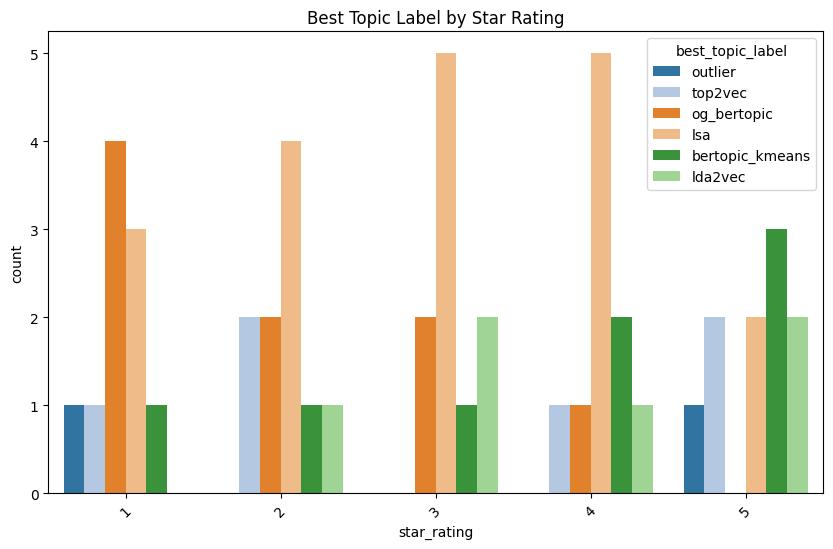

In [35]:
# plot bar chart of best_topic_label by star_rating
plt.figure(figsize=(10, 6))
sns.countplot(data=annotated, hue='best_topic_label', x='star_rating', palette='tab20')
plt.xticks(rotation=45)
plt.title('Best Topic Label by Star Rating')
plt.show()

## og_bertopic best for 1 star rating (captured order fulfillment issues), but lsa good for all ratings
-> can try using og_bertopic topics for 1 star ratings if not undetermined
## for 4/5 star ratings, all models have similar topics, so less difference in topic quality
## lsa's topics for 3 star rating reviews have less detail, so matches best in more cases

# Compare topics generated per rating between all models

In [53]:
def clean_topic_label(generated_phrase):
    if generated_phrase.startswith('Here'):
          generated_phrase = generated_phrase.split(':')[1]
     # remove double quotes
    generated_phrase = generated_phrase.replace('"', '')
    return generated_phrase

In [57]:
from collections import defaultdict
cols = ['lsa_topic_label', 'lda2vec_topic_label', 'bertopic_kmeans_topic_label', 'top2vec_topic_label']
#create dict {model_type: {star_rating:[topic_labels]}}
all_topics = {}
rating_topics = defaultdict(list)
for col in cols:
    by_rating = output.groupby('star_rating')[col].apply(lambda x: set(x)).to_dict()
    all_topics[col] = by_rating
    for rating, topics in by_rating.items():
        topics = [clean_topic_label(topic) for topic in topics]
        model = col.split('_')[0]
        model += '_kmeans' if 'bertopic' in model else ''
        topics = [(topic, model) for topic in topics]
        rating_topics[rating].extend(topics)

all_topics

{'lsa_topic_label': {1.0: {'Disappointing lotion with old formula and scent causes skin issues',
   'Sensitizing rash or breakouts on dry or sensitive skin using lotion.',
   'Strong lotion with bad smell and poor scent'},
  2.0: {"Dry lotion with poor moisturizing formula, doesn't work well with skin type.",
   'Lotion has mild, sweet scent similar to vanilla, but lacks strong smell.',
   'Old formula products with ingredient changes may not meet expectations'},
  3.0: {"Good lotion for dry skin, but doesn't work as expected.",
   "Here's a phrase that summarizes the topics based on the provided keywords and rating: Product works most of the time, but occasional breakage.",
   'Hydrates and helps dry skin, though may not fully address oily issues'},
  4.0: {'Moisturizing lotion for dry skin with a pleasant scent',
   'Smells nice and good like vanilla'},
  5.0: {'Luxurious lotion with amazing scent and softening properties',
   'Moisturizes dry skin, leaving it soft and feeling great'

In [58]:
rating_topics

defaultdict(list,
            {1.0: [('Disappointing lotion with old formula and scent causes skin issues',
               'lsa'),
              ('Sensitizing rash or breakouts on dry or sensitive skin using lotion.',
               'lsa'),
              ('Strong lotion with bad smell and poor scent', 'lsa'),
              ('Defective pump and poor lotion quality in received product.',
               'lda2vec'),
              ('Fragrant lotion formula with unpleasant scent.', 'lda2vec'),
              ('Disappointing lip balm formula with poor odor and skin reaction',
               'lda2vec'),
              ("Product doesn't work on dry skin", 'bertopic_kmeans'),
              ('Strong fragrance does not last, poor skin performance',
               'bertopic_kmeans'),
              ('Dead formula or lotions in old or used products',
               'bertopic_kmeans'),
              ('Old formula discontinued, fails to moisturize, and lacks fragrance',
               'top2vec'),
       